In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'/homelocal/mrilee/git/pystareplotlib')

import os
os.environ['PROJ_LIB'] = '/homelocal/mrilee/opt/anaconda3/envs/stare-1/share/proj'

import starepandas
import geopandas
import cartopy
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import pystare
import os

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading a country

In [4]:
gdf = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))#, rows=slice(120, 130))
gdf = gdf[gdf.name =='Luxembourg']

level = 4

roi = starepandas.STAREDataFrame(gdf)
roi.set_sids(roi.make_sids(resolution=level), inplace=True)

roi.to_stare_singleres(inplace=True)
roi.set_trixels(roi.make_trixels(), inplace=True)

sids = roi.sids.iloc[0]

In [5]:

sids8 = roi.make_sids(resolution=9)
roi['sids8'] = sids8
roi['trixels8'] = roi.make_trixels('sids8')


In [6]:
proj = cartopy.crs.NearsidePerspective(central_longitude=-110, central_latitude=20)
proj = cartopy.crs.PlateCarree()

opts = {'projection': proj}

transf = cartopy.crs.Geodetic()

<AxesSubplot:>

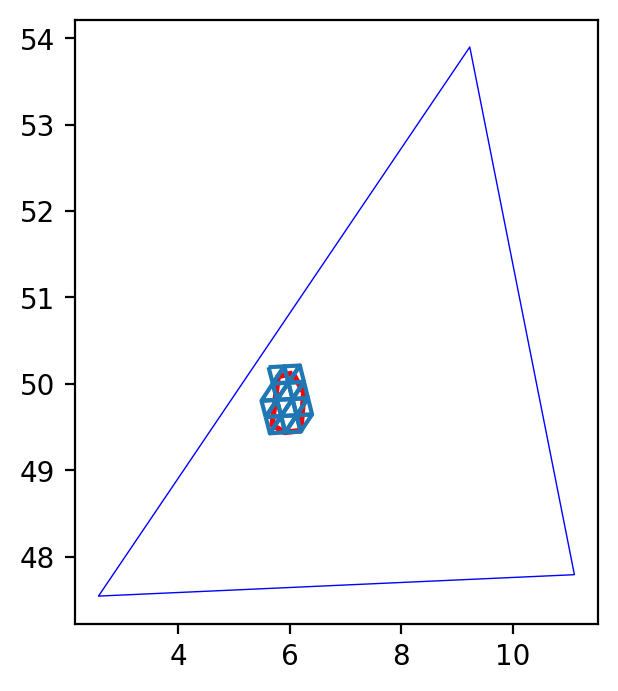

In [7]:
proj = cartopy.crs.NearsidePerspective(central_longitude=-110, central_latitude=20)
proj = cartopy.crs.PlateCarree()
opts = {'projection': proj}
transf = cartopy.crs.Geodetic()

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
#ax.coastlines()
#ax.set_extent([-179, -50, 90, 10])

roi.plot(ax=ax, trixels=True,  lw=0.5, color='b')
roi.plot(ax=ax, trixels=False, boundary=False, lw=2, color='white', edgecolor='r')
roi.set_trixels('trixels8').plot(ax=ax)

In [8]:
sids = roi.hex()

# Reading iFVOs from the pods for the country

In [ ]:
s1 = starepandas.read_pods(pod_root='/tablespace/xcal/starepods/', sids=[sids[0][0]], pattern='S1', add_podname=True)

In [ ]:
s1.set_sids('stare',inplace=True)

In [ ]:
roi['sids8']

In [ ]:
s1.reset_index(inplace=True); s1

In [ ]:
# s1.hex()

In [ ]:
import numpy

In [ ]:
s1['level']=2**(10-pystare.spatial_resolution(s1['stare']))

In [ ]:
max(pystare.spatial_resolution(s1['stare']))

In [ ]:
# s1['level']=pystare.spatial_resolution(s1['stare'])

In [ ]:
# max(s1['level'] - (s1['stare'] & 31))

In [ ]:
mask = s1.stare_intersects(roi['sids8'].iloc[0]); mask

In [ ]:
roi['sids8'].values[0]

In [ ]:
s1_ = s1[mask]

In [ ]:
s1_.reset_index(inplace=True)

In [ ]:
s1_

In [ ]:
# s1_ = s1

In [ ]:
s1_.set_sids('stare', inplace=True)

## Plotting

In [ ]:
s1_.set_geometry(geopandas.points_from_xy(s1_.lon, s1_.lat, crs=4326), inplace=True)

In [ ]:
s1_.set_trixels(s1_.make_trixels(n_workers=600), inplace=True)

In [ ]:
bounds = roi.bounds.values.flatten(); bounds

In [ ]:
bbox = [bounds[0],bounds[2],bounds[1],bounds[3]]; bbox

In [ ]:
# proj = cartopy.crs.NearsidePerspective(central_longitude=-110, central_latitude=20)
proj = cartopy.crs.PlateCarree()
opts = {'projection': proj}

fig, ax = plt.subplots(figsize=(8, 8), dpi=200, subplot_kw=opts)
ax.coastlines()
#ax.set_extent([-179, -50, 90, 10])
#ax.set_extent(bbox)

roi.set_trixels('trixels8').plot(ax=ax, trixels=True, lw=1, color='y', transform=transf, alpha=0.4, boundary=True)
roi.boundary.plot(ax=ax, transform=transf, lw=0.5, color='r')

# s1_.plot(ax=ax, trixels=False, lw=0.1, color='g', transform=transf, markersize=1)
s1_.plot(ax=ax, column='Tc1', trixels=False, lw=0.1, transform=transf, markersize=1*s1_['level'], alpha=0.125, cmap='rainbow_r')

# Add a column with the resolution level to set the markersize.

In [ ]:
#proj = cartopy.crs.NearsidePerspective(central_longitude=-110, central_latitude=20)
#proj = cartopy.crs.PlateCarree()
#opts = {'projection': proj}

fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
#ax.coastlines()
#ax.set_extent([-166, -149, 18, 23])

s1.plot(ax=ax, trixels=False,  markersize=0.2, color='k', marker='.')
s1.plot(ax=ax, trixels=True, lw=0.2, color='g')
roi.plot(ax=ax, trixels=True, transform=transf, lw=0.5, color='b')